In [1]:
#Import the necessary libraries 
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Want to see entire dataset
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

In [3]:
#Load the Dataset 
df = pd.read_csv('Penguin data.csv')
df

,studyName,Sample Number,Species,Island,Individual ID,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Gender,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A1,11/11/2007,39.1,18.7,181,.,MALE,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A2,11/11/2007,39.5,17.4,186,3800,FEMALE,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A1,11/16/2007,40.3,18.0,.,3250,FEMALE,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A2,11/16/2007,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,N3A1,11/16/2007,36.7,19.3,193,3450,FEMALE,NaN
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,N3A2,11/16/2007,39.3,20.6,190,3650,MALE,NaN
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Torgersen,N4A1,11/15/2007,38.9,17.8,181,3625,FEMALE,Nest never observed with full clutch.
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Torgersen,N4A2,11/15/2007,39.2,19.6,195,4675,MALE,Nest never observed with full clutch.
8,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Torgersen,N5A1,11/9/2007,34.1,18.1,193,3475,NaN,No blood sample obtained.
9,PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Torgersen,N5A2,11/9/2007,42.0,20.2,190,4250,NaN,No blood sample obtained for sexing.


In [4]:
#To Check the first two record's
df.head(2)

,studyName,Sample Number,Species,Island,Individual ID,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Gender,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A1,11/11/2007,39.1,18.7,181,.,MALE,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A2,11/11/2007,39.5,17.4,186,3800,FEMALE,NaN


In [5]:
#To Get the information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Individual ID        344 non-null    object 
 5   Date Egg             344 non-null    object 
 6   Culmen Length (mm)   342 non-null    float64
 7   Culmen Depth (mm)    342 non-null    float64
 8   Flipper Length (mm)  342 non-null    object 
 9   Body Mass (g)        342 non-null    object 
 10  Gender               334 non-null    object 
 11  Comments             26 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 32.4+ KB


In [6]:
#To check the value count of the Species
df['Species'].value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

In [7]:
#To check the value count of the studyName
df['studyName'].value_counts()

studyName
PAL0910    120
PAL0809    114
PAL0708    110
Name: count, dtype: int64

In [8]:
#To get all the column's
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Island', 'Individual ID', 'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Gender', 'Comments'], dtype='object')

In [9]:
# Pre-prunning
# we have to drop certain variables basis on non-significant
df.drop(['studyName','Sample Number', 'Individual ID', 'Date Egg','Comments'], inplace=True, axis=1)

In [10]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Gender
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181,.,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,.,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193,3450,FEMALE


In [11]:
#To check the null values in the dataset
df.isnull().sum()/len(df)*100

Species                0.000000
Island                 0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Gender                 2.906977
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    object 
 5   Body Mass (g)        342 non-null    object 
 6   Gender               334 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.9+ KB


In [13]:
#To check the value count of Flipper Length 
df['Flipper Length (mm)'].value_counts()

Flipper Length (mm)
190    22
187    16
195    16
193    15
210    14
191    13
215    12
196    10
197    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
230     7
192     7
181     7
189     7
184     7
188     6
222     6
201     6
213     6
217     6
199     6
214     6
209     5
219     5
218     5
221     5
203     5
180     5
194     5
178     4
200     4
228     4
225     4
202     4
205     3
224     3
182     3
223     2
183     2
229     2
211     2
207     2
231     1
176     1
174     1
.       1
206     1
172     1
179     1
226     1
Name: count, dtype: int64

In [14]:
#Put the nan where we have '.'
df['Flipper Length (mm)'] = np.where(df['Flipper Length (mm)'] == '.', np.nan,df['Flipper Length (mm)'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  341 non-null    object 
 5   Body Mass (g)        342 non-null    object 
 6   Gender               334 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.9+ KB


In [16]:
#To convert the datatype of the feature 
df['Flipper Length (mm)'] = pd.to_numeric(df['Flipper Length (mm)'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  341 non-null    float64
 5   Body Mass (g)        342 non-null    object 
 6   Gender               334 non-null    object 
dtypes: float64(3), object(4)
memory usage: 18.9+ KB


In [18]:
#Put the nan where we have '.'
df['Body Mass (g)'] = np.where(df['Body Mass (g)'] == '.', np.nan,df['Body Mass (g)'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  341 non-null    float64
 5   Body Mass (g)        341 non-null    object 
 6   Gender               334 non-null    object 
dtypes: float64(3), object(4)
memory usage: 18.9+ KB


In [20]:
#To convert the datatype of the feature 
df['Body Mass (g)'] = pd.to_numeric(df['Body Mass (g)'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  341 non-null    float64
 5   Body Mass (g)        341 non-null    float64
 6   Gender               334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [22]:
#To see the value of count, mean, standard deviation, minimum, maximum, Q1, Q2 and Q3
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,342.000000,342.000000,341.000000,341.000000
mean,43.921930,17.151170,200.932551,4203.079179
std,5.459584,1.974793,14.078712,802.758144
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: ylabel='Culmen Length (mm)'>

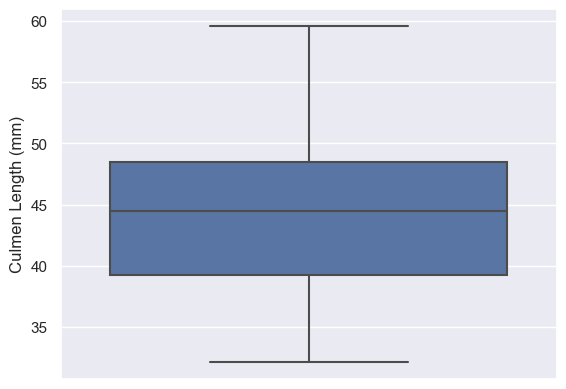

In [23]:
#To Check the outliers we make the box plot of 'Culmen Length (mm)' 
sns.boxplot(y='Culmen Length (mm)', data=df)

<Axes: ylabel='Culmen Depth (mm)'>

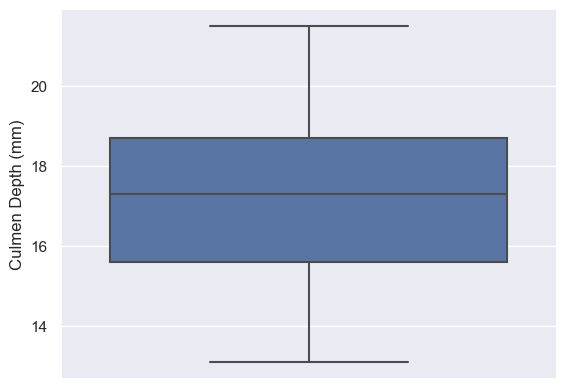

In [24]:
#To Check the outliers we make the box plot of 'Culmen Depth (mm)' 
sns.boxplot(y='Culmen Depth (mm)', data=df)

<Axes: ylabel='Flipper Length (mm)'>

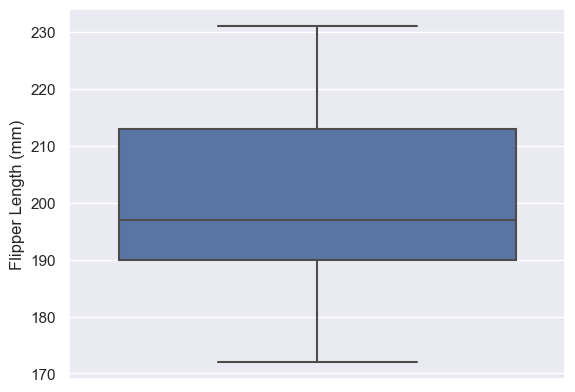

In [25]:
#To Check the outliers we make the box plot of 'Flipper Length (mm)' 
sns.boxplot(y='Flipper Length (mm)', data=df)

<Axes: ylabel='Body Mass (g)'>

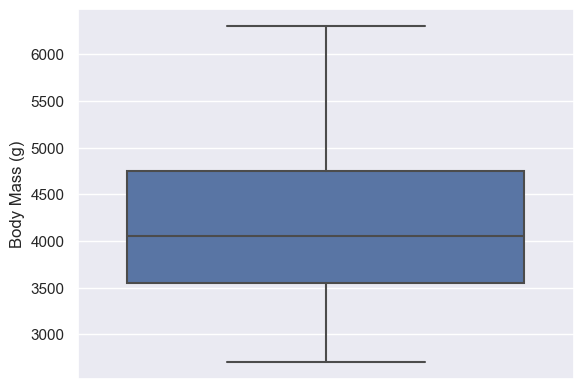

In [26]:
#To Check the outliers we make the box plot of 'Body Mass (g)' 
sns.boxplot(y='Body Mass (g)', data=df)

In [27]:
df.columns

Index(['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Gender'], dtype='object')

In [28]:
#To fill the nan with mean value's 
df['Culmen Length (mm)'] = df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].mean())
df['Culmen Depth (mm)'] = df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].mean())
df['Flipper Length (mm)'] = df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].mean())
df['Body Mass (g)'] = df['Body Mass (g)'].fillna(df['Body Mass (g)'].mean())

In [29]:
#To check the null values
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Gender                 10
dtype: int64

In [30]:
#To check the value count of 'Gender'
df['Gender'].value_counts()

Gender
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [31]:
#To put the value of mode of the Gender where we have '.'
df['Gender'] = np.where(df['Gender'] == '.', 'MALE',df['Gender'])

In [33]:
#To check the null values
df.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Gender                 0
dtype: int64

In [34]:
#To check the value count of 'Gender'
df['Gender'].value_counts()

Gender
MALE      179
FEMALE    165
Name: count, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   344 non-null    float64
 3   Culmen Depth (mm)    344 non-null    float64
 4   Flipper Length (mm)  344 non-null    float64
 5   Body Mass (g)        344 non-null    float64
 6   Gender               344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [36]:
#To make the categories of the 'Species' 
df['Species'] = df['Species'].astype('category')
df['Species'] = df['Species'].cat.codes
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Gender
0,0,Torgersen,39.10000,18.70000,181.000000,4203.079179,MALE
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.00000,200.932551,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.15117,200.932551,4203.079179,MALE
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [37]:
#To check the value count of 'Species' 
df['Species'].value_counts() #Dependent variable

Species
0    152
2    124
1     68
Name: count, dtype: int64

In [38]:
#To check the value counts of the 'Island'
df['Island'].value_counts()

Island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [39]:
#To perform the encoding on 'Island'
df = pd.get_dummies(df, columns=['Island'])

In [40]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Gender,Island_Biscoe,Island_Dream,Island_Torgersen
0,0,39.10000,18.70000,181.000000,4203.079179,MALE,False,False,True
1,0,39.50000,17.40000,186.000000,3800.000000,FEMALE,False,False,True
2,0,40.30000,18.00000,200.932551,3250.000000,FEMALE,False,False,True
3,0,43.92193,17.15117,200.932551,4203.079179,MALE,False,False,True
4,0,36.70000,19.30000,193.000000,3450.000000,FEMALE,False,False,True


In [41]:
#To check the value count of the 'Gender'
df['Gender'].value_counts()

Gender
MALE      179
FEMALE    165
Name: count, dtype: int64

In [42]:
#To make the categories of the 'Gender' 
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Gender,Island_Biscoe,Island_Dream,Island_Torgersen
0,0,39.10000,18.70000,181.000000,4203.079179,1,False,False,True
1,0,39.50000,17.40000,186.000000,3800.000000,0,False,False,True
2,0,40.30000,18.00000,200.932551,3250.000000,0,False,False,True
3,0,43.92193,17.15117,200.932551,4203.079179,1,False,False,True
4,0,36.70000,19.30000,193.000000,3450.000000,0,False,False,True


In [43]:
#To delete the 'Island_Biscoe' column
df = df.drop(['Island_Biscoe'],axis=1)

In [44]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Gender,Island_Dream,Island_Torgersen
0,0,39.10000,18.70000,181.000000,4203.079179,1,False,True
1,0,39.50000,17.40000,186.000000,3800.000000,0,False,True
2,0,40.30000,18.00000,200.932551,3250.000000,0,False,True
3,0,43.92193,17.15117,200.932551,4203.079179,1,False,True
4,0,36.70000,19.30000,193.000000,3450.000000,0,False,True


Number of A : 152
Number of B : 124
Number of C : 68


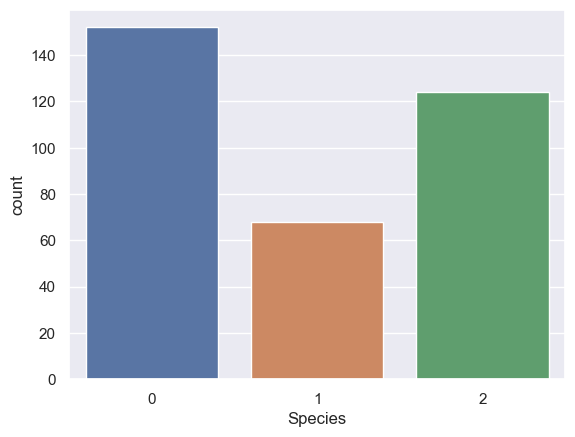

In [45]:
#To make the count plot of 'Species'
sns.countplot(data=df, x='Species')
A, B, C = df['Species'].value_counts()
print("Number of A :", A)
print("Number of B :", B)
print("Number of C :", C)
plt.show()

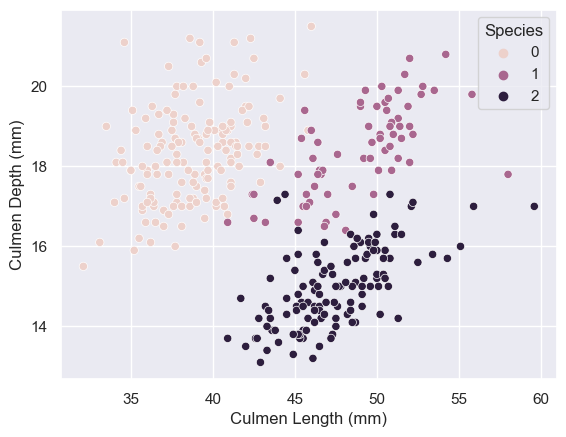

In [46]:
#To make the scatter plot for check the spread of the data 
sns.scatterplot(x='Culmen Length (mm)', y = 'Culmen Depth (mm)',data=df, hue='Species')
plt.show()

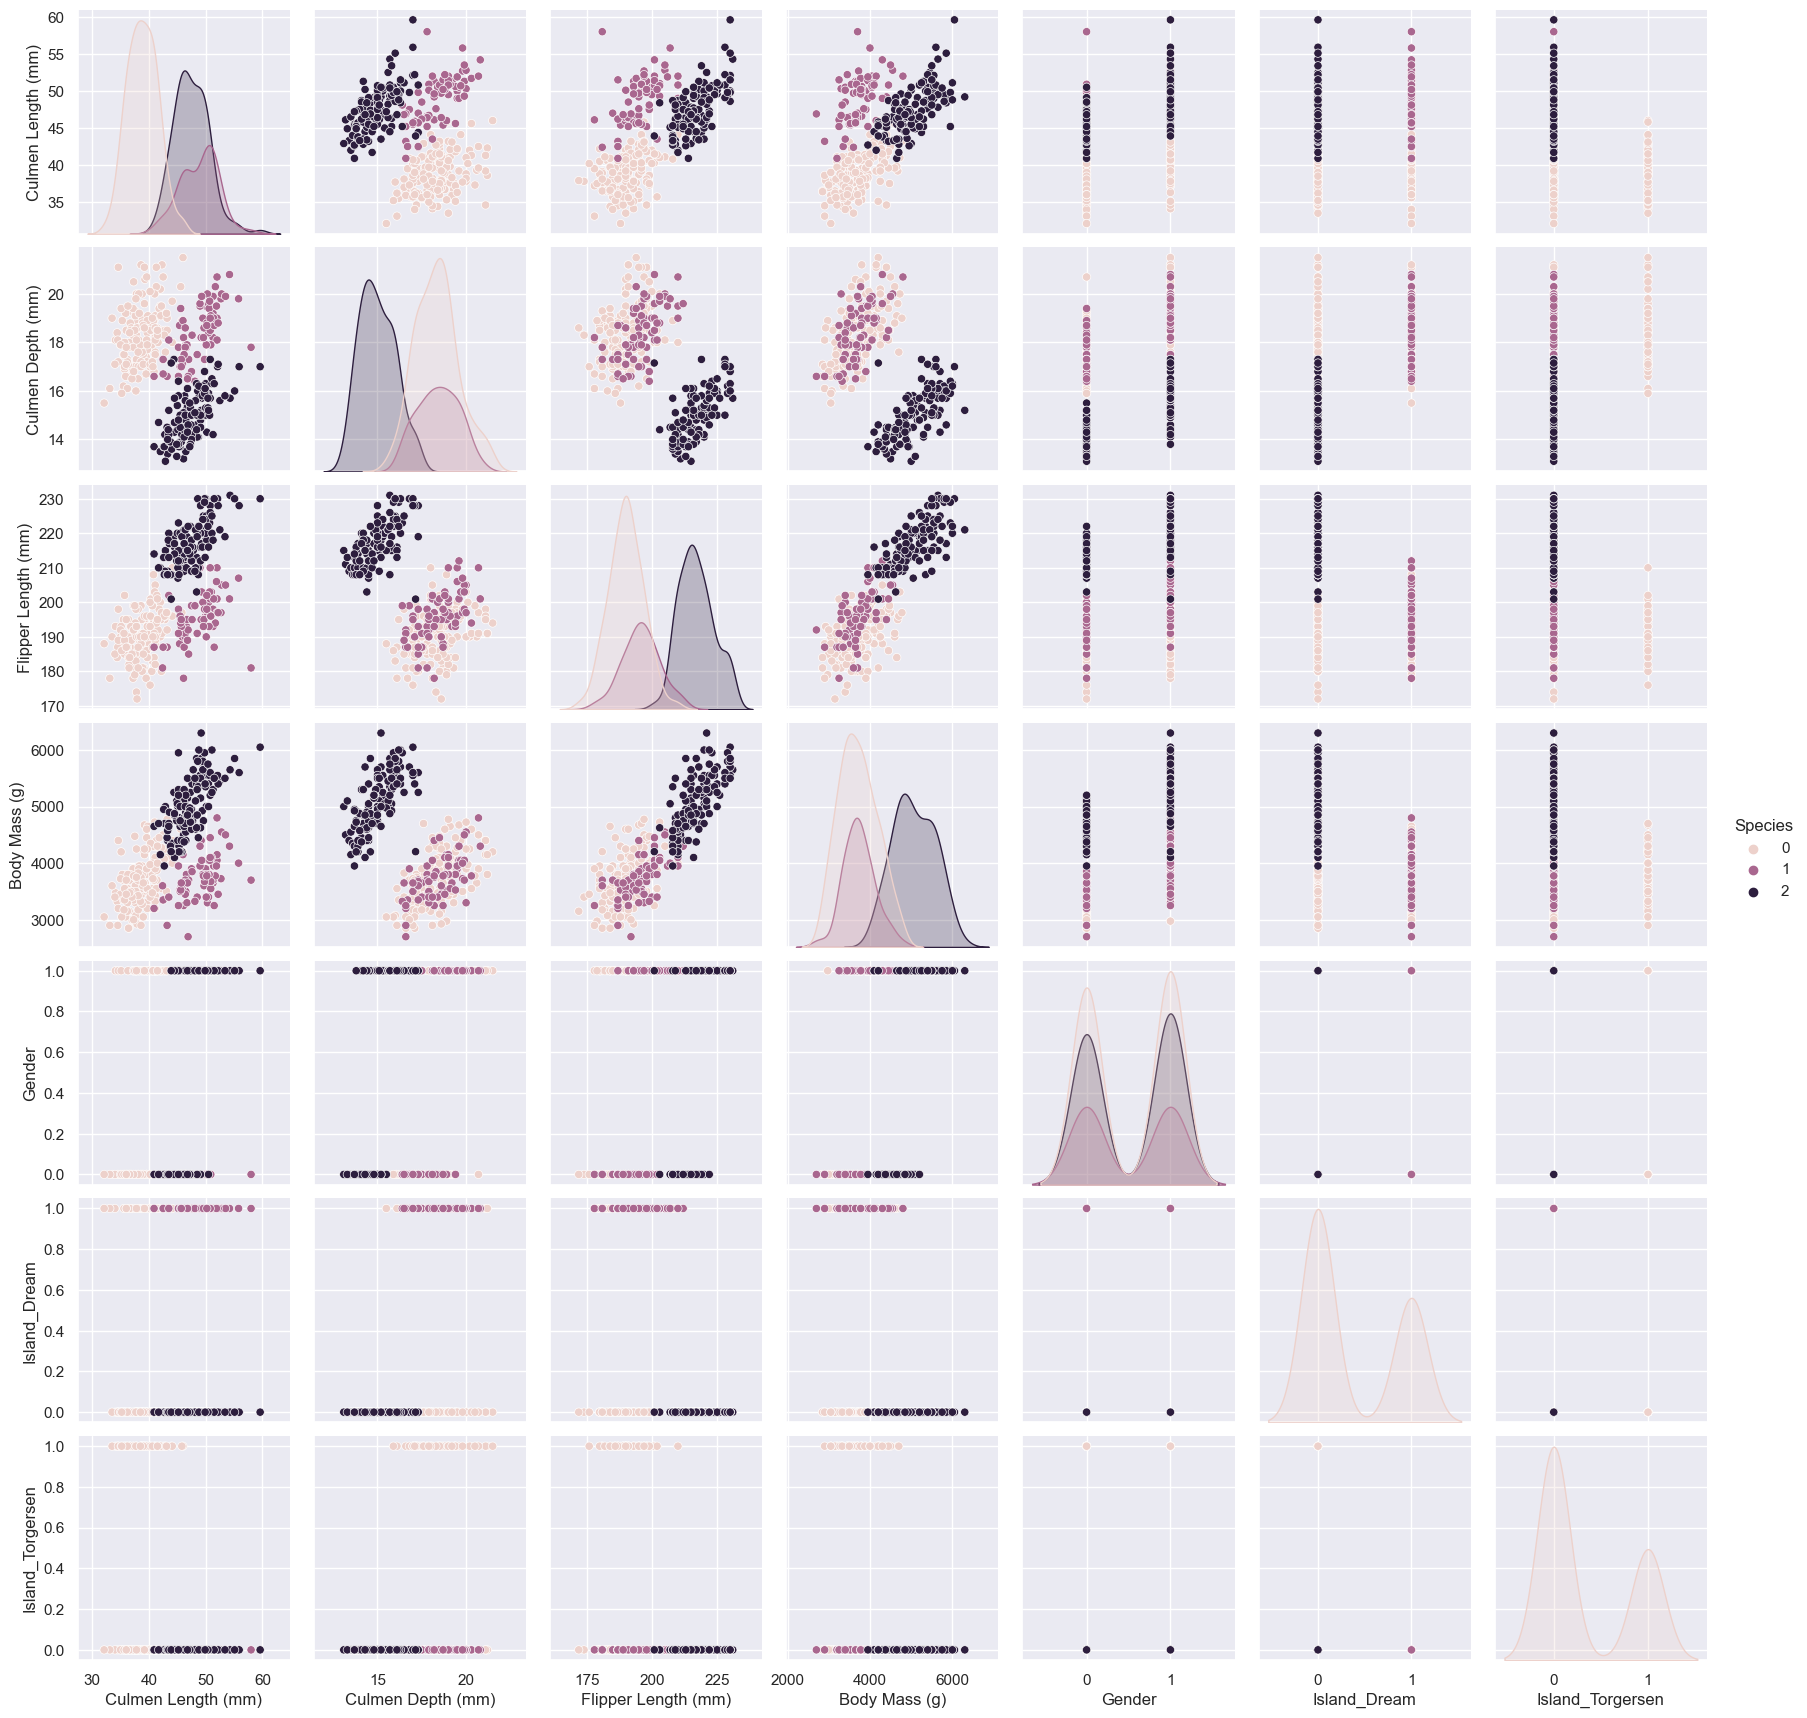

In [47]:
#To make the pairplot of 'Species'
sns.pairplot(data=df, hue='Species')
plt.show()

<Axes: >

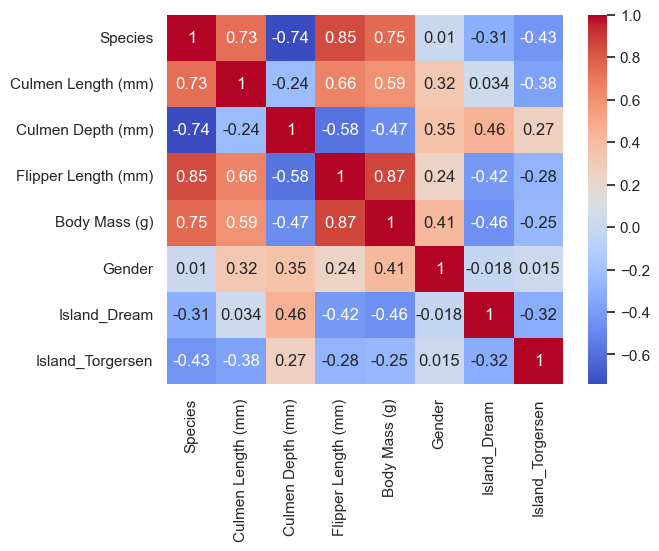

In [48]:
#To check the correlation between variables we make heatmap 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

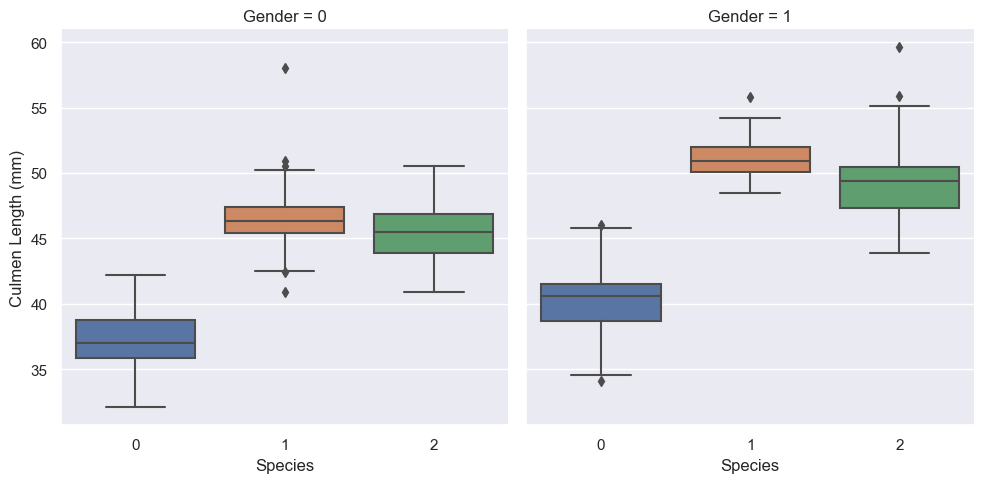

In [49]:
#To make the cat plot
sns.catplot(data=df, x= 'Species', y= 'Culmen Length (mm)', kind = 'box', col='Gender')

In [50]:
# Suggestion - pls use pandas profilling

In [51]:
df.head(2)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Gender,Island_Dream,Island_Torgersen
0,0,39.1,18.7,181.0,4203.079179,1,False,True
1,0,39.5,17.4,186.0,3800.000000,0,False,True


In [52]:
#Split the data into independent and dependent variables
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [53]:
x.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Gender,Island_Dream,Island_Torgersen
0,39.10000,18.70000,181.000000,4203.079179,1,False,True
1,39.50000,17.40000,186.000000,3800.000000,0,False,True
2,40.30000,18.00000,200.932551,3250.000000,0,False,True
3,43.92193,17.15117,200.932551,4203.079179,1,False,True
4,36.70000,19.30000,193.000000,3450.000000,0,False,True


In [54]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int8

In [55]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_sc


array([[-8.87081226e-01,  7.87742515e-01, -1.42409747e+00, ...,
         9.60097760e-01, -7.50757194e-01,  2.36968028e+00],
       [-8.13493989e-01,  1.26556330e-01, -1.06686837e+00, ...,
        -1.04156060e+00, -7.50757194e-01,  2.36968028e+00],
       [-6.66319516e-01,  4.31719184e-01, -2.03061234e-15, ...,
        -1.04156060e+00, -7.50757194e-01,  2.36968028e+00],
       ...,
       [ 1.19175820e+00, -7.38071758e-01,  1.50518115e+00, ...,
         9.60097760e-01, -7.50757194e-01, -4.21997858e-01],
       [ 2.35124131e-01, -1.19581604e+00,  7.90722946e-01, ...,
        -1.04156060e+00, -7.50757194e-01, -4.21997858e-01],
       [ 1.09977416e+00, -5.34629855e-01,  8.62168766e-01, ...,
         9.60097760e-01, -7.50757194e-01, -4.21997858e-01]])

In [56]:
pd.DataFrame(x_sc)

,0,1,2,3,4,5,6
0,-8.870812e-01,7.877425e-01,-1.424097e+00,1.139607e-15,0.960098,-0.750757,2.369680
1,-8.134940e-01,1.265563e-01,-1.066868e+00,-5.050628e-01,-1.041561,-0.750757,2.369680
2,-6.663195e-01,4.317192e-01,-2.030612e-15,-1.194219e+00,-1.041561,-0.750757,2.369680
3,-1.307172e-15,1.806927e-15,-2.030612e-15,1.139607e-15,0.960098,-0.750757,2.369680
4,-1.328605e+00,1.092905e+00,-5.667476e-01,-9.436168e-01,-1.041561,-0.750757,2.369680
5,-8.502876e-01,1.754092e+00,-7.810851e-01,-6.930145e-01,0.960098,-0.750757,2.369680
6,-9.238748e-01,3.299982e-01,-1.424097e+00,-7.243398e-01,-1.041561,-0.750757,2.369680
7,-8.686844e-01,1.245487e+00,-4.238560e-01,5.913222e-01,0.960098,-0.750757,2.369680
8,-1.806922e+00,4.825797e-01,-5.667476e-01,-9.122916e-01,0.960098,-0.750757,2.369680
9,-3.535738e-01,1.550650e+00,-7.810851e-01,5.879233e-02,0.960098,-0.750757,2.369680


In [57]:
# Split the data into train and test for building the model and prediction
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=101)

# Decision tree model

In [58]:
#To make the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion = 'gini')
dt1.fit(x_train,y_train)
dt2 = DecisionTreeClassifier(criterion = 'entropy')
dt2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [59]:
#Predict the values of test data with the help of model 
y_pred_dt1_train = dt1.predict(x_train)
y_pred_dt1_test = dt1.predict(x_test)

y_pred_dt2_train = dt2.predict(x_train)
y_pred_dt2_test = dt2.predict(x_test)



In [60]:
#Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [61]:
confusion_matrix(y_test, y_pred_dt1_test)

array([[30,  1,  0],
       [ 0, 17,  0],
       [ 1,  0, 20]], dtype=int64)

In [62]:
print(classification_report(y_train, y_pred_dt1_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00       103

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [63]:
print(classification_report(y_test, y_pred_dt1_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.94      1.00      0.97        17
           2       1.00      0.95      0.98        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [64]:
#To print the accuracy of Training and Testing 
print("Train Accuracy",accuracy_score(y_train, y_pred_dt1_train))
print("*********"*5)
print("Test Accuracy",accuracy_score(y_test, y_pred_dt1_test))

Train Accuracy 1.0
*********************************************
Test Accuracy 0.9710144927536232


In [65]:
#To print the accuracy of Training and Testing 
print("Train Accuracy",accuracy_score(y_train, y_pred_dt2_train))
print("*********"*5)
print("Test Accuracy",accuracy_score(y_test, y_pred_dt2_test))

Train Accuracy 1.0
*********************************************
Test Accuracy 0.9855072463768116


# Updates - Boosting Method with the same dataset

# AdaBoosting

In [84]:
#To Perform the Ada Bossting 
from sklearn.ensemble import AdaBoostClassifier
# Regression: from sklearn.ensemble import AdaBoostRegressor
adcls = AdaBoostClassifier(n_estimators=50,random_state=1)
adcls.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [85]:
#To predict the test data 
y_pred_ada_train = adcls.predict(x_train)
y_pred_ada_test = adcls.predict(x_test)

In [86]:
#To print the accuracy of Training and Testing 
print("Train Accuracy",accuracy_score(y_train, y_pred_ada_train))
print("*********"*5)
print("Test Accuracy",accuracy_score(y_test, y_pred_ada_test))

Train Accuracy 0.9927272727272727
*********************************************
Test Accuracy 0.9855072463768116


# Gradient Boosting Decision Tree(GBDT)

In [87]:
#To Perform the Gradient Bossting 
from sklearn.ensemble import GradientBoostingClassifier
# Regression: from sklearn.ensemble import GradientBoostingRegressor
gbcls = GradientBoostingClassifier(random_state=1)
gbcls.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [88]:
#To predict the test data 
y_pred_gdb_train = gbcls.predict(x_train)
y_pred_gdb_test = gbcls.predict(x_test)

In [89]:
#To print the accuracy of Training and Testing 
print("Train Accuracy",accuracy_score(y_train, y_pred_gdb_train))
print("*********"*5)
print("Test Accuracy",accuracy_score(y_test, y_pred_gdb_test))

Train Accuracy 1.0
*********************************************
Test Accuracy 1.0


# XGBoost model is not supported by Sklearn

In [90]:
!pip install xgboost

In [91]:
!pip install --upgrade xgboost scikit-learn

In [92]:
#To peform Xg boosting 
from xgboost import XGBClassifier
xgb_cls = XGBClassifier()
xgb_cls.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [93]:
#To predict the test data 
y_pred_xgb_train = xgb_cls.predict(x_train)
y_pred_xgb_test = xgb_cls.predict(x_test)

In [94]:
#To print the accuracy of Training and Testing 
print("Train Accuracy",accuracy_score(y_train, y_pred_xgb_train))
print("*********"*5)
print("Test Accuracy",accuracy_score(y_test, y_pred_xgb_test))

Train Accuracy 1.0
*********************************************
Test Accuracy 1.0
